In [54]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import darts
from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
)
from darts.metrics import mape, smape
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

# for reproducibility
torch.manual_seed(1)
np.random.seed(1)


In [64]:
df = pd.read_excel('Load.xlsx', index_col = 0, parse_dates=True)
df.head()

,load
time,
2021-01-01 01:00:00,36627.6875
2021-01-01 02:00:00,34880.0240
2021-01-01 03:00:00,34346.5450
2021-01-01 04:00:00,33840.1035
2021-01-01 05:00:00,33072.9300


# WHATS YOUR DAMN PROBLEM?!
https://unit8co.github.io/darts/generated_api/darts.timeseries.html

In [76]:
darts.timeseries.TimeSeries.from_dataframe(df, fill_missing_dates=True, freq='H`)

SyntaxError: EOL while scanning string literal (1351630426.py, line 1)

In [75]:
darts.timeseries.TimeSeries.from_dataframe(df)

[2022-03-23 00:08:10,736] ERROR | darts.timeseries | ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.


ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.

In [74]:
darts.timeseries.TimeSeries.from_csv('Load.csv')

[2022-03-23 00:06:49,832] ERROR | darts.timeseries | ValueError: If time_col is not specified, the DataFrame must be indexed either witha DatetimeIndex, or with a RangeIndex.


ValueError: If time_col is not specified, the DataFrame must be indexed either witha DatetimeIndex, or with a RangeIndex.

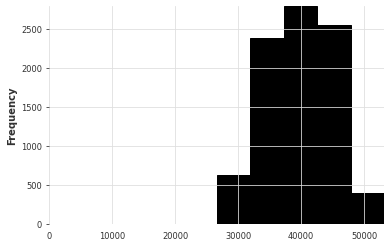

In [17]:
df['load'].plot.hist(edgecolor='k').autoscale(enable=True, axis='both', tight=True)

<AxesSubplot:xlabel='time'>

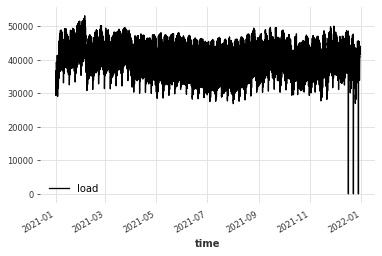

In [13]:
df.plot()

<AxesSubplot:xlabel='time'>

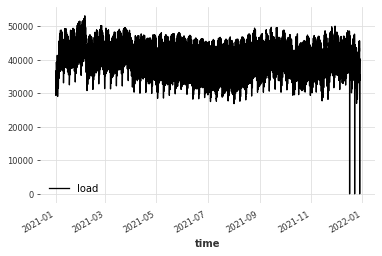

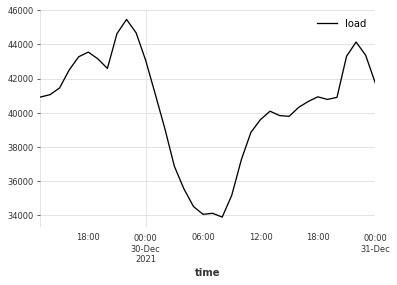

In [14]:
series1, series2 = df[:-36], df[-36:]
series1.plot()
series2.plot()

In [33]:
#Oida wieso funktioniert das nicht?
train, val = df.split_before(0.75)

AttributeError: 'DataFrame' object has no attribute 'split_before'

<AxesSubplot:xlabel='time'>

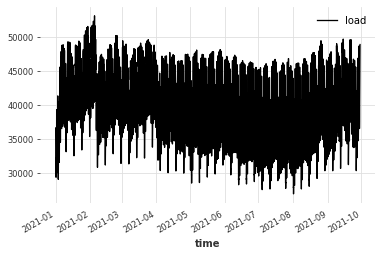

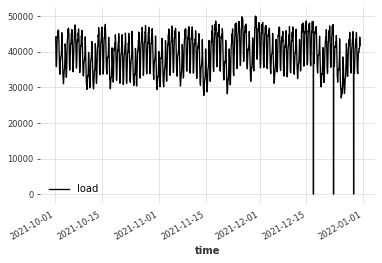

In [48]:
#spliti = df.size*0.75
train, val = df[:6522], df[-2184:]
train.plot()
val.plot()


In [45]:
df.size-df.size*0.75

2184.0

# Inspect Seasonality

something seems to be missing in this object - see error

In [50]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)

AttributeError: 'DataFrame' object has no attribute '_assert_univariate'

In [52]:
model = NBEATSModel(
    input_chunk_length=24, output_chunk_length=12, n_epochs=200, random_state=0
)
model.fit(train, verbose=True)

ValueError: __len__() should return >= 0